Imports de bibliothèques et modules







In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Lecture des données à partir d'un fichier Excel et affichage des cinq premières lignes du DataFrame.

In [ ]:
df1 = pd.read_excel("TARGET_NBL_ClinicalData_Validation_20230322.xlsx")
df1.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,TARGET USI,Gender,Race,Ethnicity,Age at Diagnosis in Days,First Event,Event Free Survival Time in Days,Vital Status,Overall Survival Time in Days,Year of Diagnosis,Year of Last Follow Up,Protocol,INSS Stage,MYCN status,Ploidy,Ploidy Value,Histology,Grade,MKI,Diagnostic Category,ICDO,ICDO Description,COG Risk Group,Percent Tumor,Percent Necrosis,Percent Tumor v/s Stroma,Sites of Disease Involvement,Site of Relapse,Relapse Percent Tumor,Relapse Percent Necrosis,Relapse Percent Tumor v/s Stroma
0,TARGET-30-PARPUF,Male,White,Hispanic or Latino,96,Censored,3701,Alive,3701,2007,2017,ANBL00B1,Stage 4,Not Amplified,Hyperdiploid (DI>1),1.48,Favorable,Undifferentiated or Poorly Differentiated,Low,Neuroblastoma,C74.9,"Adrenal gland, NOS\nSuprarenal gland\nAdrenal,...",Intermediate Risk,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TARGET-30-PARSVF,Male,White,Not Hispanic or Latino,964,Relapse,997,Dead,1516,2007,2012,"ANBL00B1, ADVL0921",Stage 4,Not Amplified,Diploid (DI=1),1.00,Unfavorable,Undifferentiated or Poorly Differentiated,High,Neuroblastoma,C48.0,Retroperitoneum\nPeriadrenal tissue\nPerinephr...,High Risk,50,NaN,NaN,NaN,Bone; Bone Marrow; Other metastatic sites,NaN,NaN,NaN
2,TARGET-30-PARSXI,Female,White,Not Hispanic or Latino,538,Censored,3928,Alive,3928,2007,2018,ANBL00B1,Stage 4,Not Amplified,Hyperdiploid (DI>1),1.99,Favorable,Undifferentiated or Poorly Differentiated,Low,Neuroblastoma,C74.9,"Adrenal gland, NOS\nSuprarenal gland\nAdrenal,...",Intermediate Risk,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TARGET-30-PARSZV,Male,White,Not Hispanic or Latino,287,Relapse,2675,Alive,3995,2008,2018,ANBL00B1,Stage 2a,Not Amplified,Hyperdiploid (DI>1),1.58,Favorable,Undifferentiated or Poorly Differentiated,Low,Neuroblastoma,C38.3,"Mediastinum, NOS",Low Risk,80,NaN,NaN,NaN,Primary site,NaN,NaN,NaN
4,TARGET-30-PARTCE,Male,White,Not Hispanic or Latino,67,Censored,3625,Alive,3625,2008,2017,ANBL00B1,Stage 1,Not Amplified,Hyperdiploid (DI>1),2.13,Favorable,Undifferentiated or Poorly Differentiated,Low,Neuroblastoma,C74.9,"Adrenal gland, NOS\nSuprarenal gland\nAdrenal,...",Low Risk,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Analyse de base du DataFrame

In [ ]:
df1.shape

(499, 31)

In [ ]:
df1.columns

Index(['TARGET USI', 'Gender', 'Race', 'Ethnicity', 'Age at Diagnosis in Days',
       'First Event', 'Event Free Survival Time in Days', 'Vital Status',
       'Overall Survival Time in Days', 'Year of Diagnosis',
       'Year of Last Follow Up', 'Protocol', 'INSS Stage', 'MYCN status',
       'Ploidy', 'Ploidy Value', 'Histology', 'Grade', 'MKI',
       'Diagnostic Category', 'ICDO', 'ICDO Description', 'COG Risk Group',
       'Percent Tumor', 'Percent Necrosis', 'Percent Tumor v/s Stroma',
       'Sites of Disease Involvement', 'Site of Relapse',
       'Relapse Percent Tumor', 'Relapse Percent Necrosis',
       'Relapse Percent Tumor v/s Stroma'],
      dtype='object')

In [ ]:
df1.dtypes

TARGET USI                           object
Gender                               object
Race                                 object
Ethnicity                            object
Age at Diagnosis in Days              int64
First Event                          object
Event Free Survival Time in Days      int64
Vital Status                         object
Overall Survival Time in Days         int64
Year of Diagnosis                     int64
Year of Last Follow Up                int64
Protocol                             object
INSS Stage                           object
MYCN status                          object
Ploidy                               object
Ploidy Value                        float64
Histology                            object
Grade                                object
MKI                                  object
Diagnostic Category                  object
ICDO                                 object
ICDO Description                     object
COG Risk Group                  

Supression des colonnes avec beaucoup de valeurs nulls

In [ ]:
df1.isna().sum()

TARGET USI                            0
Gender                                0
Race                                  0
Ethnicity                             0
Age at Diagnosis in Days              0
First Event                           0
Event Free Survival Time in Days      0
Vital Status                          0
Overall Survival Time in Days         0
Year of Diagnosis                     0
Year of Last Follow Up                0
Protocol                              0
INSS Stage                            0
MYCN status                           0
Ploidy                                0
Ploidy Value                         14
Histology                             0
Grade                                 0
MKI                                   0
Diagnostic Category                   0
ICDO                                  0
ICDO Description                      0
COG Risk Group                        0
Percent Tumor                         0
Percent Necrosis                    498


In [ ]:
df2=df1.drop(['Percent Necrosis','Percent Tumor v/s Stroma','Sites of Disease Involvement','Site of Relapse'   ,'Relapse Percent Tumor','Relapse Percent Necrosis','Relapse Percent Tumor v/s Stroma'],axis=1)

Supression des lignes avec des valeurs nulls

In [ ]:
df2.isna().sum()

TARGET USI                           0
Gender                               0
Race                                 0
Ethnicity                            0
Age at Diagnosis in Days             0
First Event                          0
Event Free Survival Time in Days     0
Vital Status                         0
Overall Survival Time in Days        0
Year of Diagnosis                    0
Year of Last Follow Up               0
Protocol                             0
INSS Stage                           0
MYCN status                          0
Ploidy                               0
Ploidy Value                        14
Histology                            0
Grade                                0
MKI                                  0
Diagnostic Category                  0
ICDO                                 0
ICDO Description                     0
COG Risk Group                       0
Percent Tumor                        0
dtype: int64

In [ ]:
df3 = df2.dropna()
df3.isnull().sum()

Etude des types des colonnes

<Axes: ylabel='count'>

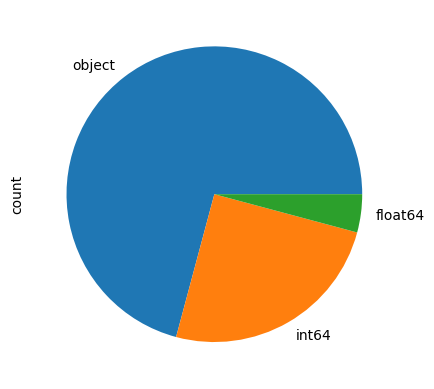

In [ ]:
df2.dtypes.value_counts().plot.pie()

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 485 entries, 0 to 498
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TARGET USI                        485 non-null    object 
 1   Gender                            485 non-null    object 
 2   Race                              485 non-null    object 
 3   Ethnicity                         485 non-null    object 
 4   Age at Diagnosis in Days          485 non-null    int64  
 5   First Event                       485 non-null    object 
 6   Event Free Survival Time in Days  485 non-null    int64  
 7   Vital Status                      485 non-null    object 
 8   Overall Survival Time in Days     485 non-null    int64  
 9   Year of Diagnosis                 485 non-null    int64  
 10  Year of Last Follow Up            485 non-null    int64  
 11  Protocol                          485 non-null    object 
 12  INSS Stage   

Spression d'une colonne unitile

In [ ]:
df3=df3.drop('TARGET USI',axis=1)

Etude des colonnes afin de reduire les dimentions pour la phase d'encodage

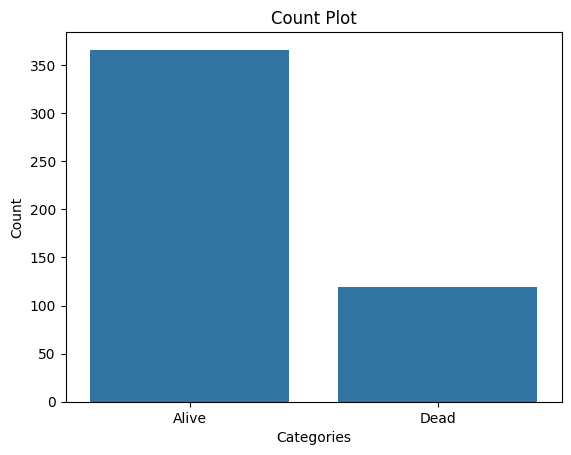

In [ ]:
sns.countplot(x='Vital Status',data=df3)

plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Count Plot')

plt.show()

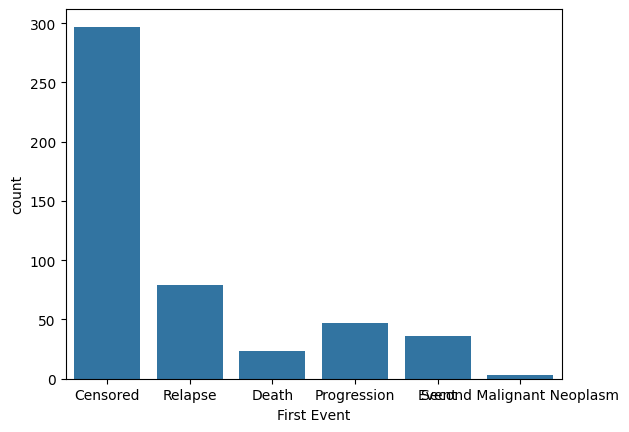

In [ ]:
sns.countplot(x='First Event',data=df3)
plt.show()

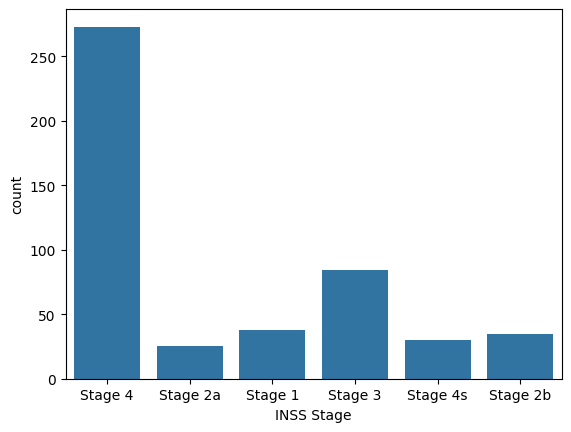

In [ ]:
sns.countplot(x='INSS Stage',data=df3)
plt.show()

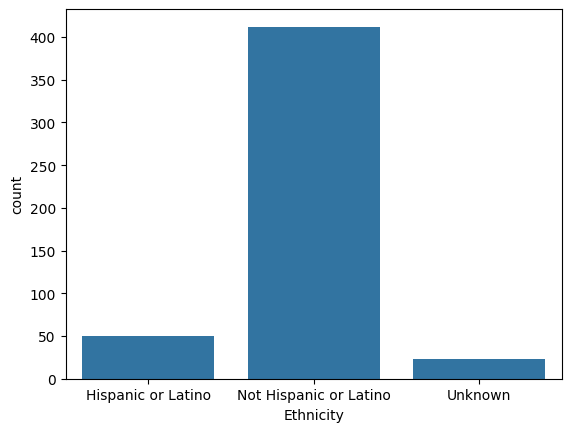

In [ ]:
sns.countplot(x='Ethnicity',data=df3)
plt.show()

In [ ]:
df3=df3[~(df3['Ethnicity']=='Unknown')]

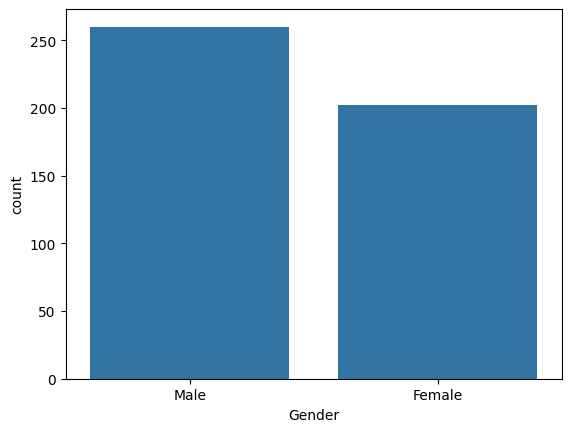

In [ ]:
sns.countplot(x='Gender',data=df3)
plt.show()

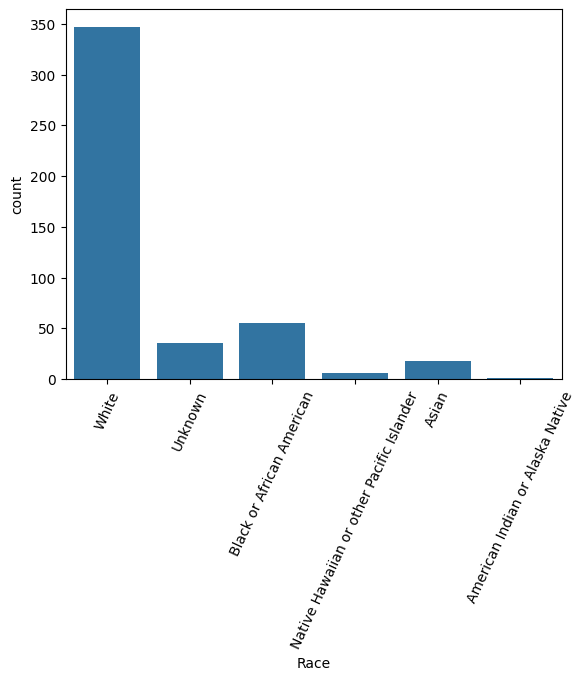

In [ ]:
sns.countplot(x='Race',data=df3)
plt.xticks(rotation=65)
plt.show()

In [ ]:
df3=df3[~(df3['Race']=='Unknown')]

In [ ]:
race_moins_20=df3['Race'].value_counts(ascending=False)
race_moins_20

Race
White                                        347
Black or African American                     55
Asian                                         18
Native Hawaiian or other Pacific Islander      6
American Indian or Alaska Native               1
Name: count, dtype: int64

In [ ]:
race_stats_less_than_20 = race_moins_20[race_moins_20<=20]
race_stats_less_than_20

Race
Asian                                        18
Native Hawaiian or other Pacific Islander     6
American Indian or Alaska Native              1
Name: count, dtype: int64

In [ ]:
len(df3.Race.unique())

5

In [ ]:
df3.Race = df3.Race.apply(lambda x: 'other' if x in race_stats_less_than_20 else x)
len(df3.Race.unique())

<ipython-input-116-fe52e5cb457c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.Race = df3.Race.apply(lambda x: 'other' if x in race_stats_less_than_20 else x)


3

In [ ]:
df3.Race.value_counts()

Race
White                        347
Black or African American     55
other                         25
Name: count, dtype: int64

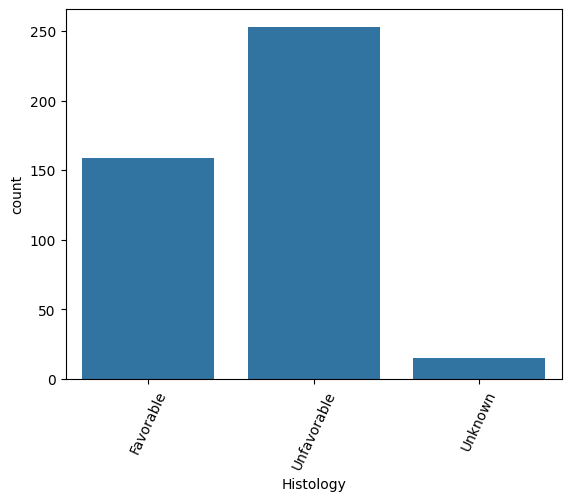

In [ ]:
sns.countplot(x='Histology',data=df3)
plt.xticks(rotation=65)
plt.show()

In [ ]:
df3=df3[~(df3['Histology']=='Unknown')]

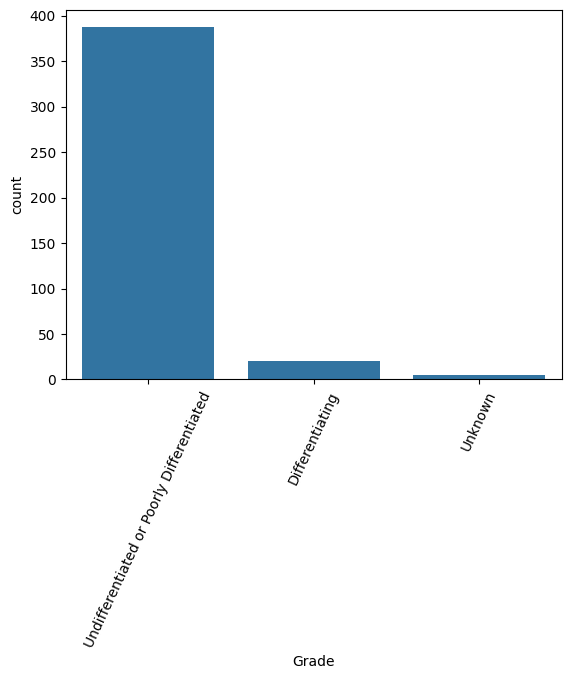

In [ ]:
sns.countplot(x='Grade',data=df3)
plt.xticks(rotation=65)
plt.show()

In [ ]:
df3=df3[~(df3['Grade']=='Unknown')]

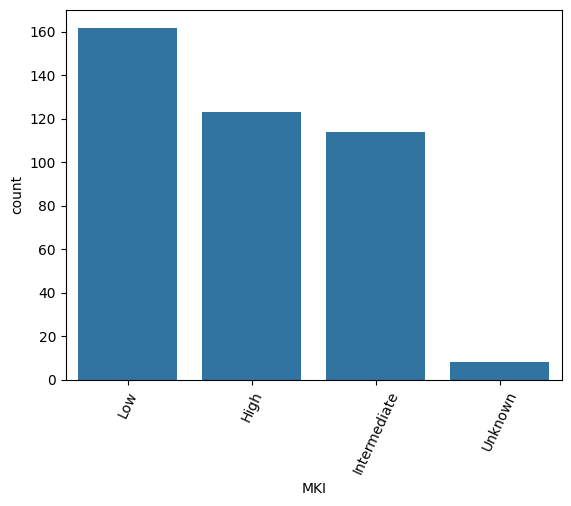

In [ ]:
sns.countplot(x='MKI',data=df3)
plt.xticks(rotation=65)
plt.show()

In [ ]:
df3=df3[~(df3['MKI']=='Unknown')]

In [ ]:
df3['Ploidy Value'][:5]

0    1.48
1    1.00
2    1.99
3    1.58
4    2.13
Name: Ploidy Value, dtype: float64

In [ ]:
df3['Ploidy'].value_counts()

Ploidy
Hyperdiploid (DI>1)    260
Diploid (DI=1)         139
Name: count, dtype: int64

In [ ]:
df3=df3.drop('Ploidy',axis=1)

In [ ]:
df3.Protocol.value_counts()

In [ ]:
protocol_moins_20=df3['Protocol'].value_counts(ascending=False)

In [ ]:
protocol_stats_less_than_20 = protocol_moins_20[protocol_moins_20<=20]
protocol_stats_less_than_20

Protocol
ANBL00B1, ANBL0531, AEPI07N1                               19
ANBL00B1, ANBL0532, ANBL0032, AEPI07N1                     10
ANBL00B1, ANBL0532, AEPI07N1                                6
ANBL00B1, ANBL0532, ANBL0032, ALTE05N1                      6
ANBL00B1, ANBL0032, AEPI07N1                                5
ANBL00B1, ANBL0531, ANBL0532, ANBL0032                      4
ANBL00B1, ANBL0931                                          4
ANBL00B1, ANBL0532, AEPI07N1, ANBL0032                      4
ANBL00B1, ANBL0531, ANBL0032                                3
ANBL00B1, ANBL00P3                                          3
ANBL00B1, ANBL0532, ANBL0931                                3
ANBL00B1, ANBL0531, ANBL0532                                3
ANBL00B1, ANBL1021                                          2
ANBL00B1, ANBL0531, ALTE05N1                                2
ANBL00B1, ANBL0032, ADVL0912                                2
ANBL00B1, ANBL0532, ANBL0931, AEPI07N1                      2

In [ ]:
df3.Protocol = df3.Protocol.apply(lambda x: 'other' if x in protocol_stats_less_than_20 else x)
len(df3.Race.unique())

3

In [ ]:
df3.ICDO.unique()

array(['C74.9', 'C48.0', 'C38.3', 'C47.0', 'C76.2', 'C49.0', 'C48.2',
       'C76.0', 'C72.9', 'C22.0', 'C47.3', 'C77.0', 'C64.9', 'C76.1',
       'C42.1', 'C76.3', 'C48.8', 'C38.2', 'C47.9', 'C75.5', 'C72.0',
       'C49.3', 'C77.3', 'C80.9', 'C47.5', 'C41.2', 'C74.1', 'C49.5',
       'C38.1', 'C49.4', 'C47.4', 'C41.0', 'C77.9', 'C47.6', 'C16.9',
       'C70.1', 'C55.9', 'C65.9', 'C40.2'], dtype=object)

In [ ]:
def categorize_diagnosis(code):
    category_mapping = {
        'Cerveau (C70-C72)': ['C74.9', 'C71.0', 'C71.1', 'C71.3', 'C71.8', 'C71.9', 'C70.1'],
        'Tractus respiratoire et organes intrathoraciques (C30-C39)': ['C38.1', 'C38.2', 'C38.3'],
        'Tractus gastro-intestinal (C15-C26)': ['C16.9', 'C22.0', 'C41.0', 'C41.2', 'C42.1', 'C48.0', 'C48.2', 'C48.8', 'C49.0', 'C49.3', 'C49.4', 'C49.5'],
        'Système nerveux périphérique et autonome (C47-C49)': ['C47.0', 'C47.3', 'C47.4', 'C47.5', 'C47.6', 'C47.9', 'C49.9'],
        'Os et articulations, parties connexes du système de soutien (C40-C41)': ['C40.2'],
        'Rein et autres voies urinaires (C64-C68)': ['C64.9'],
        'Organes génitaux (C60-C63)': ['C55.9','C75.5'],
        'other': ['C76.0', 'C76.1', 'C76.2', 'C76.3', 'C77.0', 'C77.3', 'C77.9', 'C80.9']
    }

    category = None
    for key, values in category_mapping.items():
        if code in values:
            category = key
            break

    return category


df3['Category'] = df3['ICDO'].apply(categorize_diagnosis)


In [ ]:
df3.Category.value_counts()

Category
Cerveau (C70-C72)                                                        155
other                                                                    104
Tractus gastro-intestinal (C15-C26)                                       66
Tractus respiratoire et organes intrathoraciques (C30-C39)                41
Rein et autres voies urinaires (C64-C68)                                  12
Système nerveux périphérique et autonome (C47-C49)                        10
Organes génitaux (C60-C63)                                                 3
Os et articulations, parties connexes du système de soutien (C40-C41)      1
Name: count, dtype: int64

In [ ]:
df3=df3.drop('ICDO Description',axis=1)

In [ ]:
df3['Year of Last Follow Up']=df3['Year of Last Follow Up']-df3['Year of Diagnosis']

Encodage One Hot

In [ ]:
cat_columns = ['Gender', 'Race', 'Ethnicity','First Event','Vital Status','Protocol','INSS Stage','MYCN status','Histology','Grade','MKI','Diagnostic Category','COG Risk Group','Category']

dummies = pd.get_dummies(df3[cat_columns])

df_with_dummies = pd.concat([df3, dummies], axis=1)

In [ ]:
columns_to_drop = ['Gender_Female', 'Race_other','Ethnicity_Hispanic or Latino','First Event_Second Malignant Neoplasm','Vital Status_Dead','Protocol_other','INSS Stage_Stage 2a','MYCN status_Not Amplified','Histology_Unfavorable','Grade_Differentiating','MKI_Intermediate','Diagnostic Category_Ganglioneuroblastoma, nodular','COG Risk Group_Intermediate Risk','Category_other']
df_with_dummies.drop(columns_to_drop, axis=1, inplace=True)

,Gender,Race,Ethnicity,Age at Diagnosis in Days,First Event,Event Free Survival Time in Days,Vital Status,Overall Survival Time in Days,Year of Diagnosis,Year of Last Follow Up,Protocol,INSS Stage,MYCN status,Ploidy Value,Histology,Grade,MKI,Diagnostic Category,ICDO,COG Risk Group,Percent Tumor,Category,Gender_Male,Race_Black or African American,Race_White,Ethnicity_Not Hispanic or Latino,First Event_Censored,First Event_Death,First Event_Event,First Event_Progression,First Event_Relapse,Vital Status_Alive,Protocol_ANBL00B1,"Protocol_ANBL00B1, AEPI07N1","Protocol_ANBL00B1, ANBL0032","Protocol_ANBL00B1, ANBL0531","Protocol_ANBL00B1, ANBL0532","Protocol_ANBL00B1, ANBL0532, ANBL0032",INSS Stage_Stage 1,INSS Stage_Stage 2b,INSS Stage_Stage 3,INSS Stage_Stage 4,INSS Stage_Stage 4s,MYCN status_Amplified,Histology_Favorable,Grade_Undifferentiated or Poorly Differentiated,MKI_High,MKI_Low,Diagnostic Category_Neuroblastoma,COG Risk Group_High Risk,COG Risk Group_Low Risk,Category_Cerveau (C70-C72),Category_Organes génitaux (C60-C63),"Category_Os et articulations, parties connexes du système de soutien (C40-C41)",Category_Rein et autres voies urinaires (C64-C68),Category_Système nerveux périphérique et autonome (C47-C49),Category_Tractus gastro-intestinal (C15-C26),Category_Tractus respiratoire et organes intrathoraciques (C30-C39)
0,Male,White,Hispanic or Latino,96,Censored,3701,Alive,3701,2007,10,ANBL00B1,Stage 4,Not Amplified,1.48,Favorable,Undifferentiated or Poorly Differentiated,Low,Neuroblastoma,C74.9,Intermediate Risk,60,Cerveau (C70-C72),True,False,True,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,True,True,False,True,True,False,False,True,False,False,False,False,False,False
1,Male,White,Not Hispanic or Latino,964,Relapse,997,Dead,1516,2007,5,other,Stage 4,Not Amplified,1.00,Unfavorable,Undifferentiated or Poorly Differentiated,High,Neuroblastoma,C48.0,High Risk,50,Tractus gastro-intestinal (C15-C26),True,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,True,True,False,False,False,False,False,False,True,False
2,Female,White,Not Hispanic or Latino,538,Censored,3928,Alive,3928,2007,11,ANBL00B1,Stage 4,Not Amplified,1.99,Favorable,Undifferentiated or Poorly Differentiated,Low,Neuroblastoma,C74.9,Intermediate Risk,70,Cerveau (C70-C72),False,False,True,True,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,True,True,False,True,True,False,False,True,False,False,False,False,False,False
3,Male,White,Not Hispanic or Latino,287,Relapse,2675,Alive,3995,2008,10,ANBL00B1,Stage 2a,Not Amplified,1.58,Favorable,Undifferentiated or Poorly Differentiated,Low,Neuroblastoma,C38.3,Low Risk,80,Tractus respiratoire et organes intrathoraciqu...,True,False,True,True,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,False,True,False,False,False,False,False,False,True
4,Male,White,Not Hispanic or Latino,67,Censored,3625,Alive,3625,2008,9,ANBL00B1,Stage 1,Not Amplified,2.13,Favorable,Undifferentiated or Poorly Differentiated,Low,Neuroblastoma,C74.9,Low Risk,70,Cerveau (C70-C72),True,False,True,True,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,True,True,False,False,False,False,False,False
6,Female,White,Not Hispanic or Latino,939,Censored,3810,Alive,3810,2008,10,other,Stage 3,Not Amplified,1.49,Unfavorable,Undifferentiated or Poorly Differentiated,Low,Neuroblastoma,C47.0,High Risk,85,Système nerveux périphérique et autonome (C47-...,False,False,True,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,True,True,False,False,False,False,False,True,False,False
7,Female,White,Not Hispanic or Latino,120,C

In [ ]:
df3['Age at Diagnosis']=df3['Age at Diagnosis in Days']/365

In [ ]:
df3=df3.drop(['Age at Diagnosis in Days','Overall Survival Time in Days'],axis=1)

visualisation

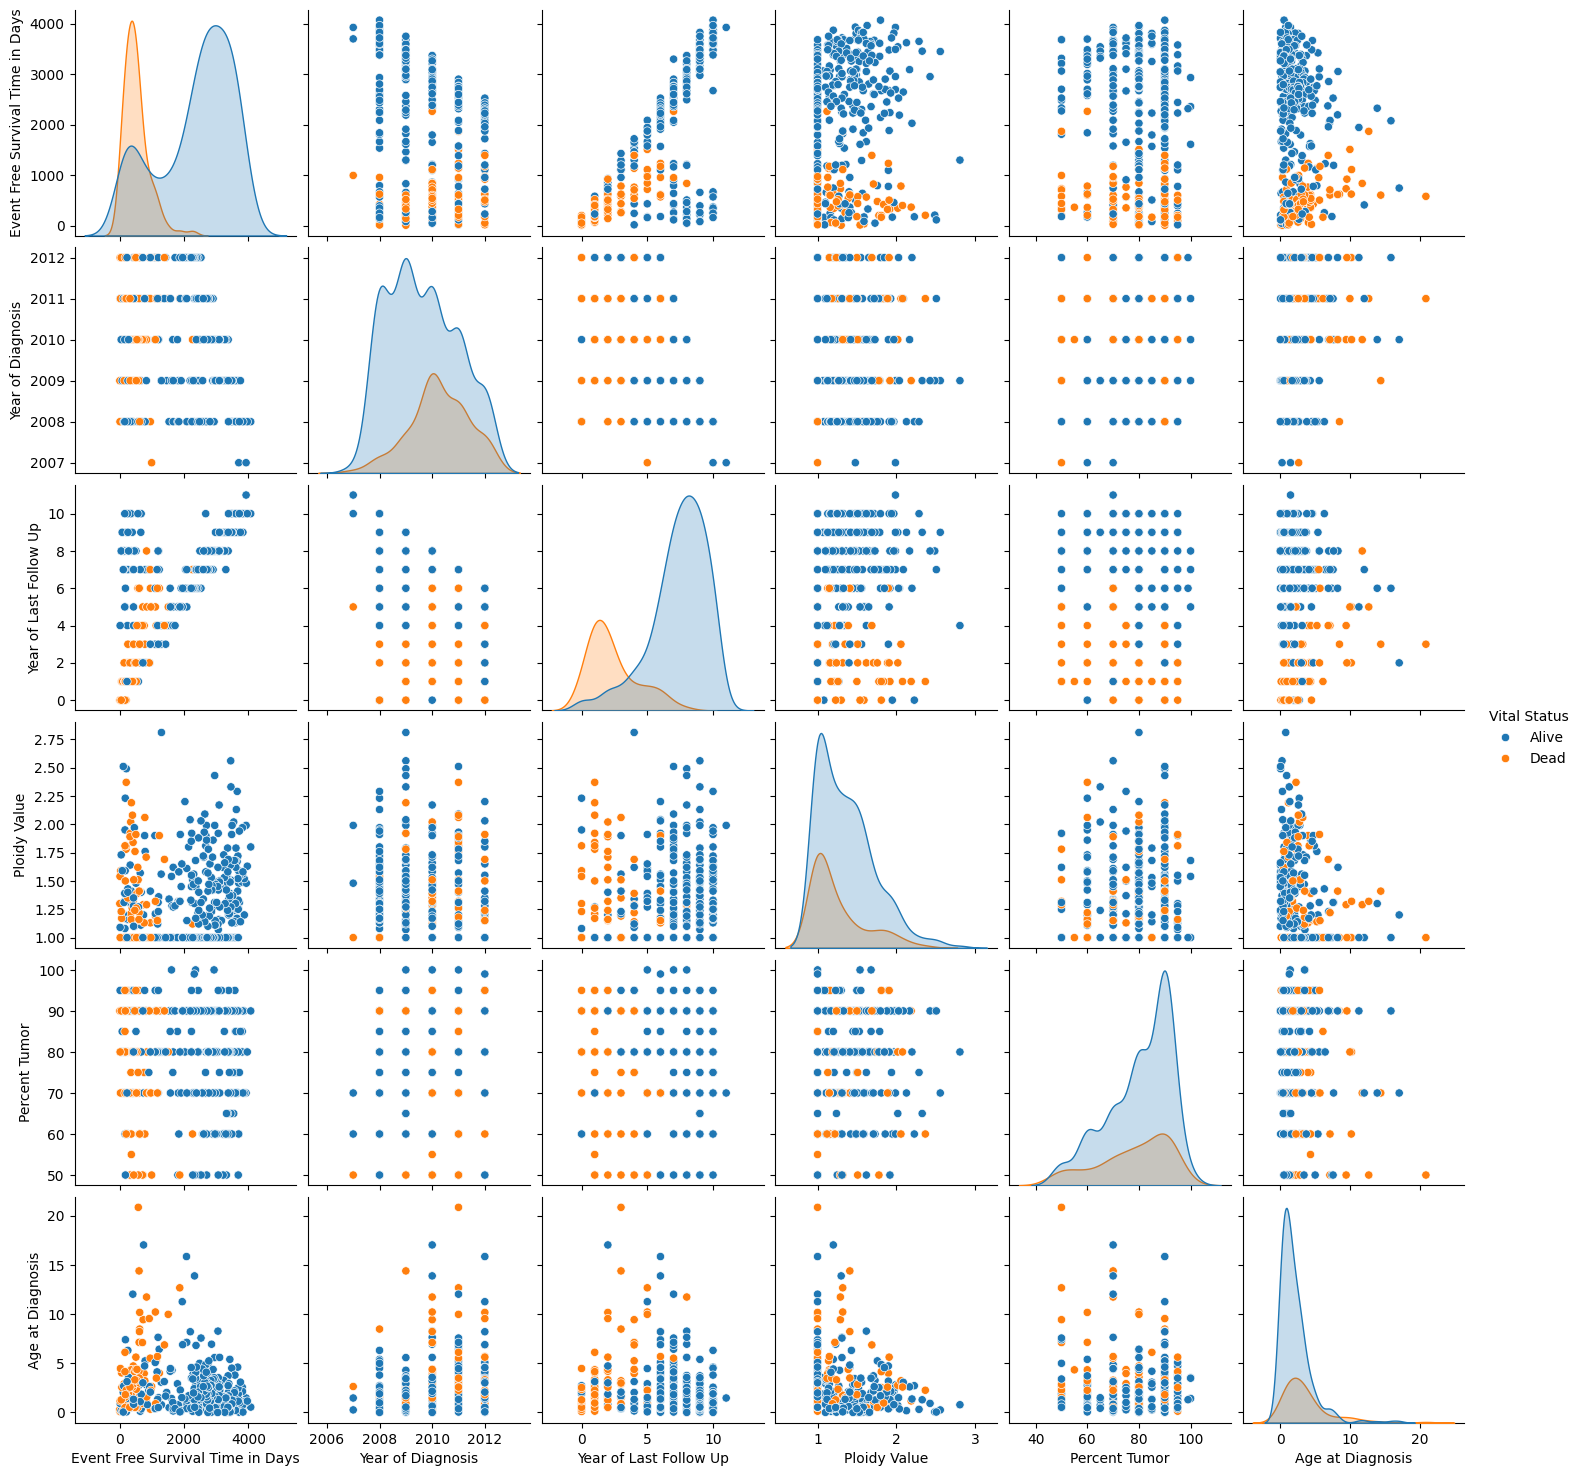

In [ ]:
sns.pairplot(df3,hue="Vital Status")

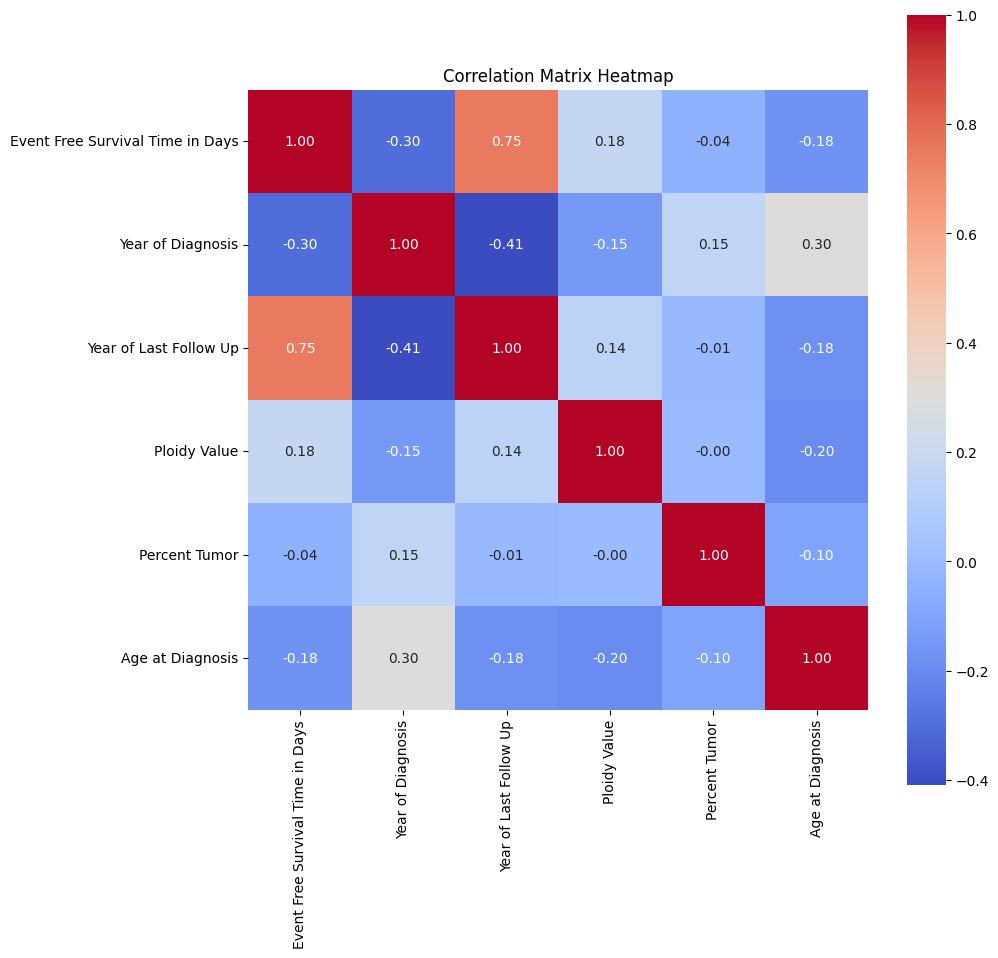

In [ ]:
numerical_columns = df3.select_dtypes(exclude=['object'])

correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

Division des donneés en train et test

In [ ]:
X=df_with_dummies.drop(['Gender', 'Race', 'Ethnicity',
       'First Event',  'Vital Status',
       'Overall Survival Time in Days', 'Protocol', 'INSS Stage', 'MYCN status', 'Histology', 'Grade', 'MKI', 'Diagnostic Category',
       'ICDO', 'COG Risk Group', 'Category','Vital Status_Alive'],axis=1)

In [ ]:
y = df_with_dummies['Vital Status_Alive']
y.head(3)

0     True
1    False
2     True
Name: Vital Status_Alive, dtype: bool

In [ ]:
len(y)

399

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
svm_linear = SVC(kernel='linear', random_state=42)
svm_rbf = SVC(kernel='rbf', random_state=42)
random_forest = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

classifiers = {
    'SVM Linear': svm_linear,
    'SVM RBF': svm_rbf,
    'Random Forest': random_forest,
    'KNN': knn,
    'Logistic Regression': logistic_regression
}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {accuracy}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


SVM Linear: Accuracy = 0.9375

Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.88      0.86        17
        True       0.97      0.95      0.96        63

    accuracy                           0.94        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.94      0.94      0.94        80


Confusion Matrix:
[[15  2]
 [ 3 60]]
SVM RBF: Accuracy = 0.825

Classification Report:
              precision    recall  f1-score   support

       False       0.57      0.71      0.63        17
        True       0.92      0.86      0.89        63

    accuracy                           0.82        80
   macro avg       0.74      0.78      0.76        80
weighted avg       0.84      0.82      0.83        80


Confusion Matrix:
[[12  5]
 [ 9 54]]
Random Forest: Accuracy = 0.9625

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.88      0.91        17


**conclusion**

SVM Linear: Précision élevée avec une précision de 0.9375. Le modèle a bien généralisé, comme en témoignent les scores de rappel et de F1-score élevés pour les deux classes.

SVM RBF: Précision légèrement inférieure avec une précision de 0.825. Le modèle a une performance moins homogène entre les classes, comme en témoignent les scores de rappel et de F1-score plus bas pour la classe False.

Random Forest: Très bonne performance avec une précision de 0.9625. Le modèle a une très bonne capacité à prédire les deux classes, comme en témoignent les scores élevés de rappel et de F1-score pour les deux classes.

KNN: Performance similaire à SVM RBF avec une précision de 0.825. Comme pour SVM RBF, le modèle a une performance moins homogène entre les classes.

Logistic Regression: Performance élevée avec une précision de 0.925. Le modèle a une bonne capacité à prédire les deux classes, comme en témoignent les scores élevés de rappel et de F1-score pour les deux classes.

En conclusion, le modèle Random Forest semble être le plus performant parmi les modèles testés, avec la plus haute précision globale et une bonne capacité à prédire les deux classes. Cependant, il est important de considérer d'autres aspects tels que le temps d'entraînement, la complexité du modèle et la taille de l'ensemble de données lors du choix du meilleur modèle pour une application spécifique.